# Ungraded Lab: Improving Computer Vision Accuracy using Convolutions





# Shallow Neural Network

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4997 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3742 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3358 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3106 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2939 - accuracy: 0.8906

MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.8751


## Convolutional Neural Network

In [13]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  # tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # tf.keras.layers.MaxPooling2D(2, 2),
  # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  # tf.keras.layers.MaxPooling2D(2,2),
  # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  # tf.keras.layers.MaxPooling2D(2,2),

  # tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # tf.keras.layers.MaxPooling2D(2, 2),
  # tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  # tf.keras.layers.MaxPooling2D(2,2),
  # tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  # tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 1, 1, 64)         

# Visualizing the Convolutions and Pooling

In [4]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 21ms/step


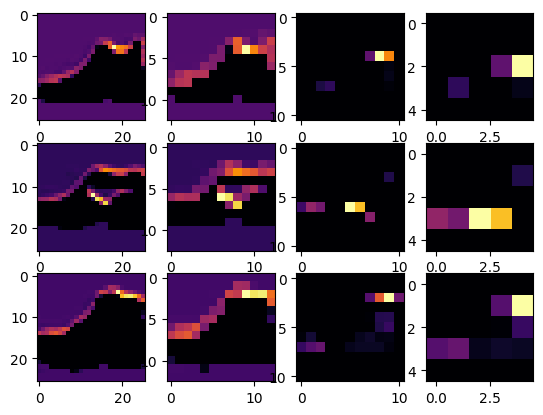

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.

### ANSWERS

(1).

Initially with 32s convolution layers
- Epoch 5/5 : 1875/1875 [==============================] - 9s 5ms/step - loss: 0.2199 - accuracy: 0.9186
- MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2618 - accuracy: 0.9051

with 16s convolution layers
- Epoch 5/5 : 1875/1875 [==============================] - 9s 5ms/step - loss: 0.2536 - accuracy: 0.9058
- MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.3072 - accuracy: 0.8905

with 64s convolution layers
- Epoch 5/5 : 1875/1875 [==============================] - 8s 4ms/step - loss: 0.1876 - accuracy: 0.9299
- MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2555 - accuracy: 0.9051

(2).

Initially with one 32 convolution layer
- Epoch 5/5 : 1875/1875 [==============================] - 8s 4ms/step - loss: 0.1633 - accuracy: 0.9402
- MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2526 - accuracy: 0.9131

with one 16 convolution layer
- Epoch 5/5 : 1875/1875 [==============================] - 7s 4ms/step - loss: 0.1798 - accuracy: 0.9342
- MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2502 - accuracy: 0.9123

with one 64 convolution layer
- Epoch 5/5 : 1875/1875 [==============================] - 7s 4ms/step - loss: 0.1405 - accuracy: 0.9482
- MODEL EVALUATION:
313/313 [==============================] - 1s 4ms/step - loss: 0.2579 - accuracy: 0.9132

(3).

with three 32 convolution layers
- Epoch 5/5 : 1875/1875 [==============================] - 9s 5ms/step - loss: 0.3176 - accuracy: 0.8827
- MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.3637 - accuracy: 0.8661

with three 16 convolution layers
- Epoch 5/5 : 1875/1875 [==============================] - 9s 5ms/step - loss: 0.3955 - accuracy: 0.8544
- MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.4065 - accuracy: 0.8516

with three 64 convolution layers
- Epoch 5/5 : 1875/1875 [==============================] - 9s 5ms/step - loss: 0.2760 - accuracy: 0.8986
- MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.3049 - accuracy: 0.8901

(4).

same answer as (2)

(5).

yes callback can be implemented

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached loss less than 0.4 so cancelling training!")
      self.model.stop_training = True

In [16]:
callback = myCallback()

In [17]:
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callback])

print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 1, 1, 64)         